
# OT for domain adaptation on empirical distributions


This example introduces a domain adaptation in a 2D setting. It explicits
the problem of domain adaptation and introduces some optimal transport
approaches to solve it.

Quantities such as optimal couplings, greater coupling coefficients and
transported samples are represented in order to give a visual understanding
of what the transport methods are doing.



In [1]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import matplotlib.pylab as pl
import ot
import ot.plot


In [2]:
# PATH 
import sys
path_files = '/Users/mzalaya/PycharmProjects/OATMIL/oatmilrouen/screenkhorn/code'
sys.path.insert(0, path_files) 
import domain_adaptation as da_screenkhorn

In [3]:
# NUMPY
import numpy as np
np.random.seed(3946)
# MATPLOTLIB
import matplotlib.pyplot as plt
plt.style.context('dark_background')
%matplotlib inline 
from matplotlib import rc
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 8, # 12
          'font.size': 8, # 12
          'legend.fontsize': 8, # 12
          'xtick.labelsize': 8, # 10
          'ytick.labelsize': 8, # 10
          'text.usetex': True,
          'figure.figsize': (16, 6)}
plt.rcParams.update(params)

# SEABORN 
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

generate data
-------------



In [4]:
n_samples_source = 10
n_samples_target = 10

Xs, ys = ot.datasets.make_data_classif('3gauss', n_samples_source)
Xt, yt = ot.datasets.make_data_classif('3gauss2', n_samples_target)

# Cost matrix
M = ot.dist(Xs, Xt, metric='sqeuclidean')

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



## Sinkhorn

In [5]:
# Sinkhorn Transport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# Sinkhorn Transport with Group lasso regularization
ot_lpl1_sinkhorn = ot.da.SinkhornLpl1Transport(reg_e=1e0, reg_cl=1e1)
ot_lpl1_sinkhorn.fit(Xs=Xs, ys=ys, Xt=Xt)

# transport source samples onto target samples
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=Xs)
transp_Xs_lpl1_sinkhorn = ot_lpl1_sinkhorn.transform(Xs=Xs)


## Screenkhorn 

In [28]:
# |I_active| = CostMatrix.shape[0] / p_n
# |J_active| = CostMatrix.shape[1] / p_m

# Screenkhorn Transport
ot_screenkhorn = da_screenkhorn.ScreenkhornTransport(reg_e=1e0)
ot_screenkhorn.fit(Xs=Xs, Xt=Xt, p_n=2, p_m=2)

# Screenkhorn Transport with Group lasso regularization
ot_lpl1_screenkhorn = da_screenkhorn.ScreenkhornLpl1Transport(reg_e=1e0, reg_cl=1e0)
ot_lpl1_screenkhorn.fit(Xs=Xs, ys=ys, Xt=Xt, p_n=2, p_m=2)

# transport source samples onto target samples
transp_Xs_screenkhorn = ot_screenkhorn.transform(Xs=Xs)
transp_Xs_lpl1_screenkhorn = ot_lpl1_screenkhorn.transform(Xs=Xs)

|I_active| = 5 	 |J_active| = 5 	 |I_active| + |J_active| = 10

|I_active| = 5 	 |J_active| = 5 	 |I_active| + |J_active| = 10

|I_active| = 5 	 |J_active| = 4 	 |I_active| + |J_active| = 9

|I_active| = 5 	 |J_active| = 4 	 |I_active| + |J_active| = 9

|I_active| = 4 	 |J_active| = 4 	 |I_active| + |J_active| = 8

|I_active| = 4 	 |J_active| = 5 	 |I_active| + |J_active| = 9

|I_active| = 4 	 |J_active| = 4 	 |I_active| + |J_active| = 8

|I_active| = 5 	 |J_active| = 5 	 |I_active| + |J_active| = 10

|I_active| = 4 	 |J_active| = 5 	 |I_active| + |J_active| = 9

|I_active| = 5 	 |J_active| = 5 	 |I_active| + |J_active| = 10

|I_active| = 4 	 |J_active| = 4 	 |I_active| + |J_active| = 8



Fig 1 : plots source and target samples + matrix of pairwise distance
---------------------------------------------------------------------



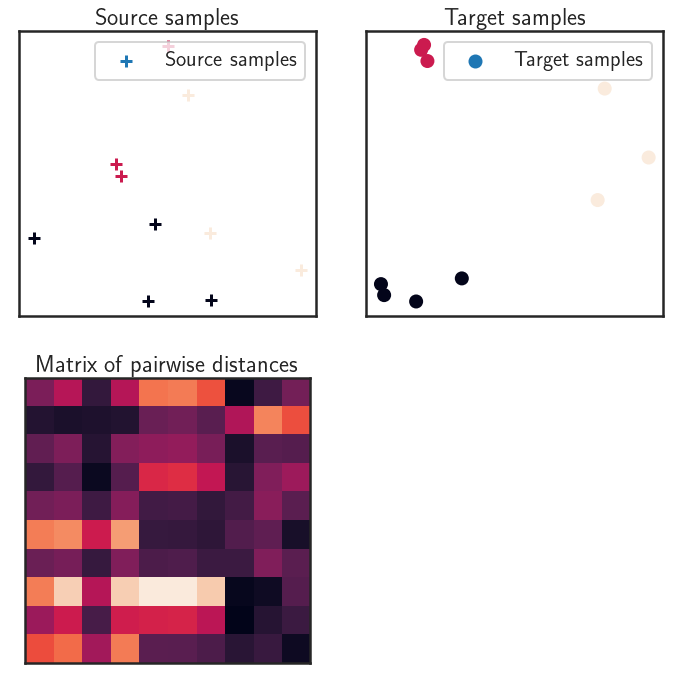

In [26]:
plt.figure(1, figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.title('Source  samples')

plt.subplot(2, 2, 2)
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
plt.xticks([])
plt.yticks([])
plt.legend(loc=0)
plt.title('Target samples')

plt.subplot(2, 2, 3)
plt.imshow(M, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Matrix of pairwise distances')
plt.tight_layout()

Fig 2 : plots optimal couplings for the different methods
---------------------------------------------------------



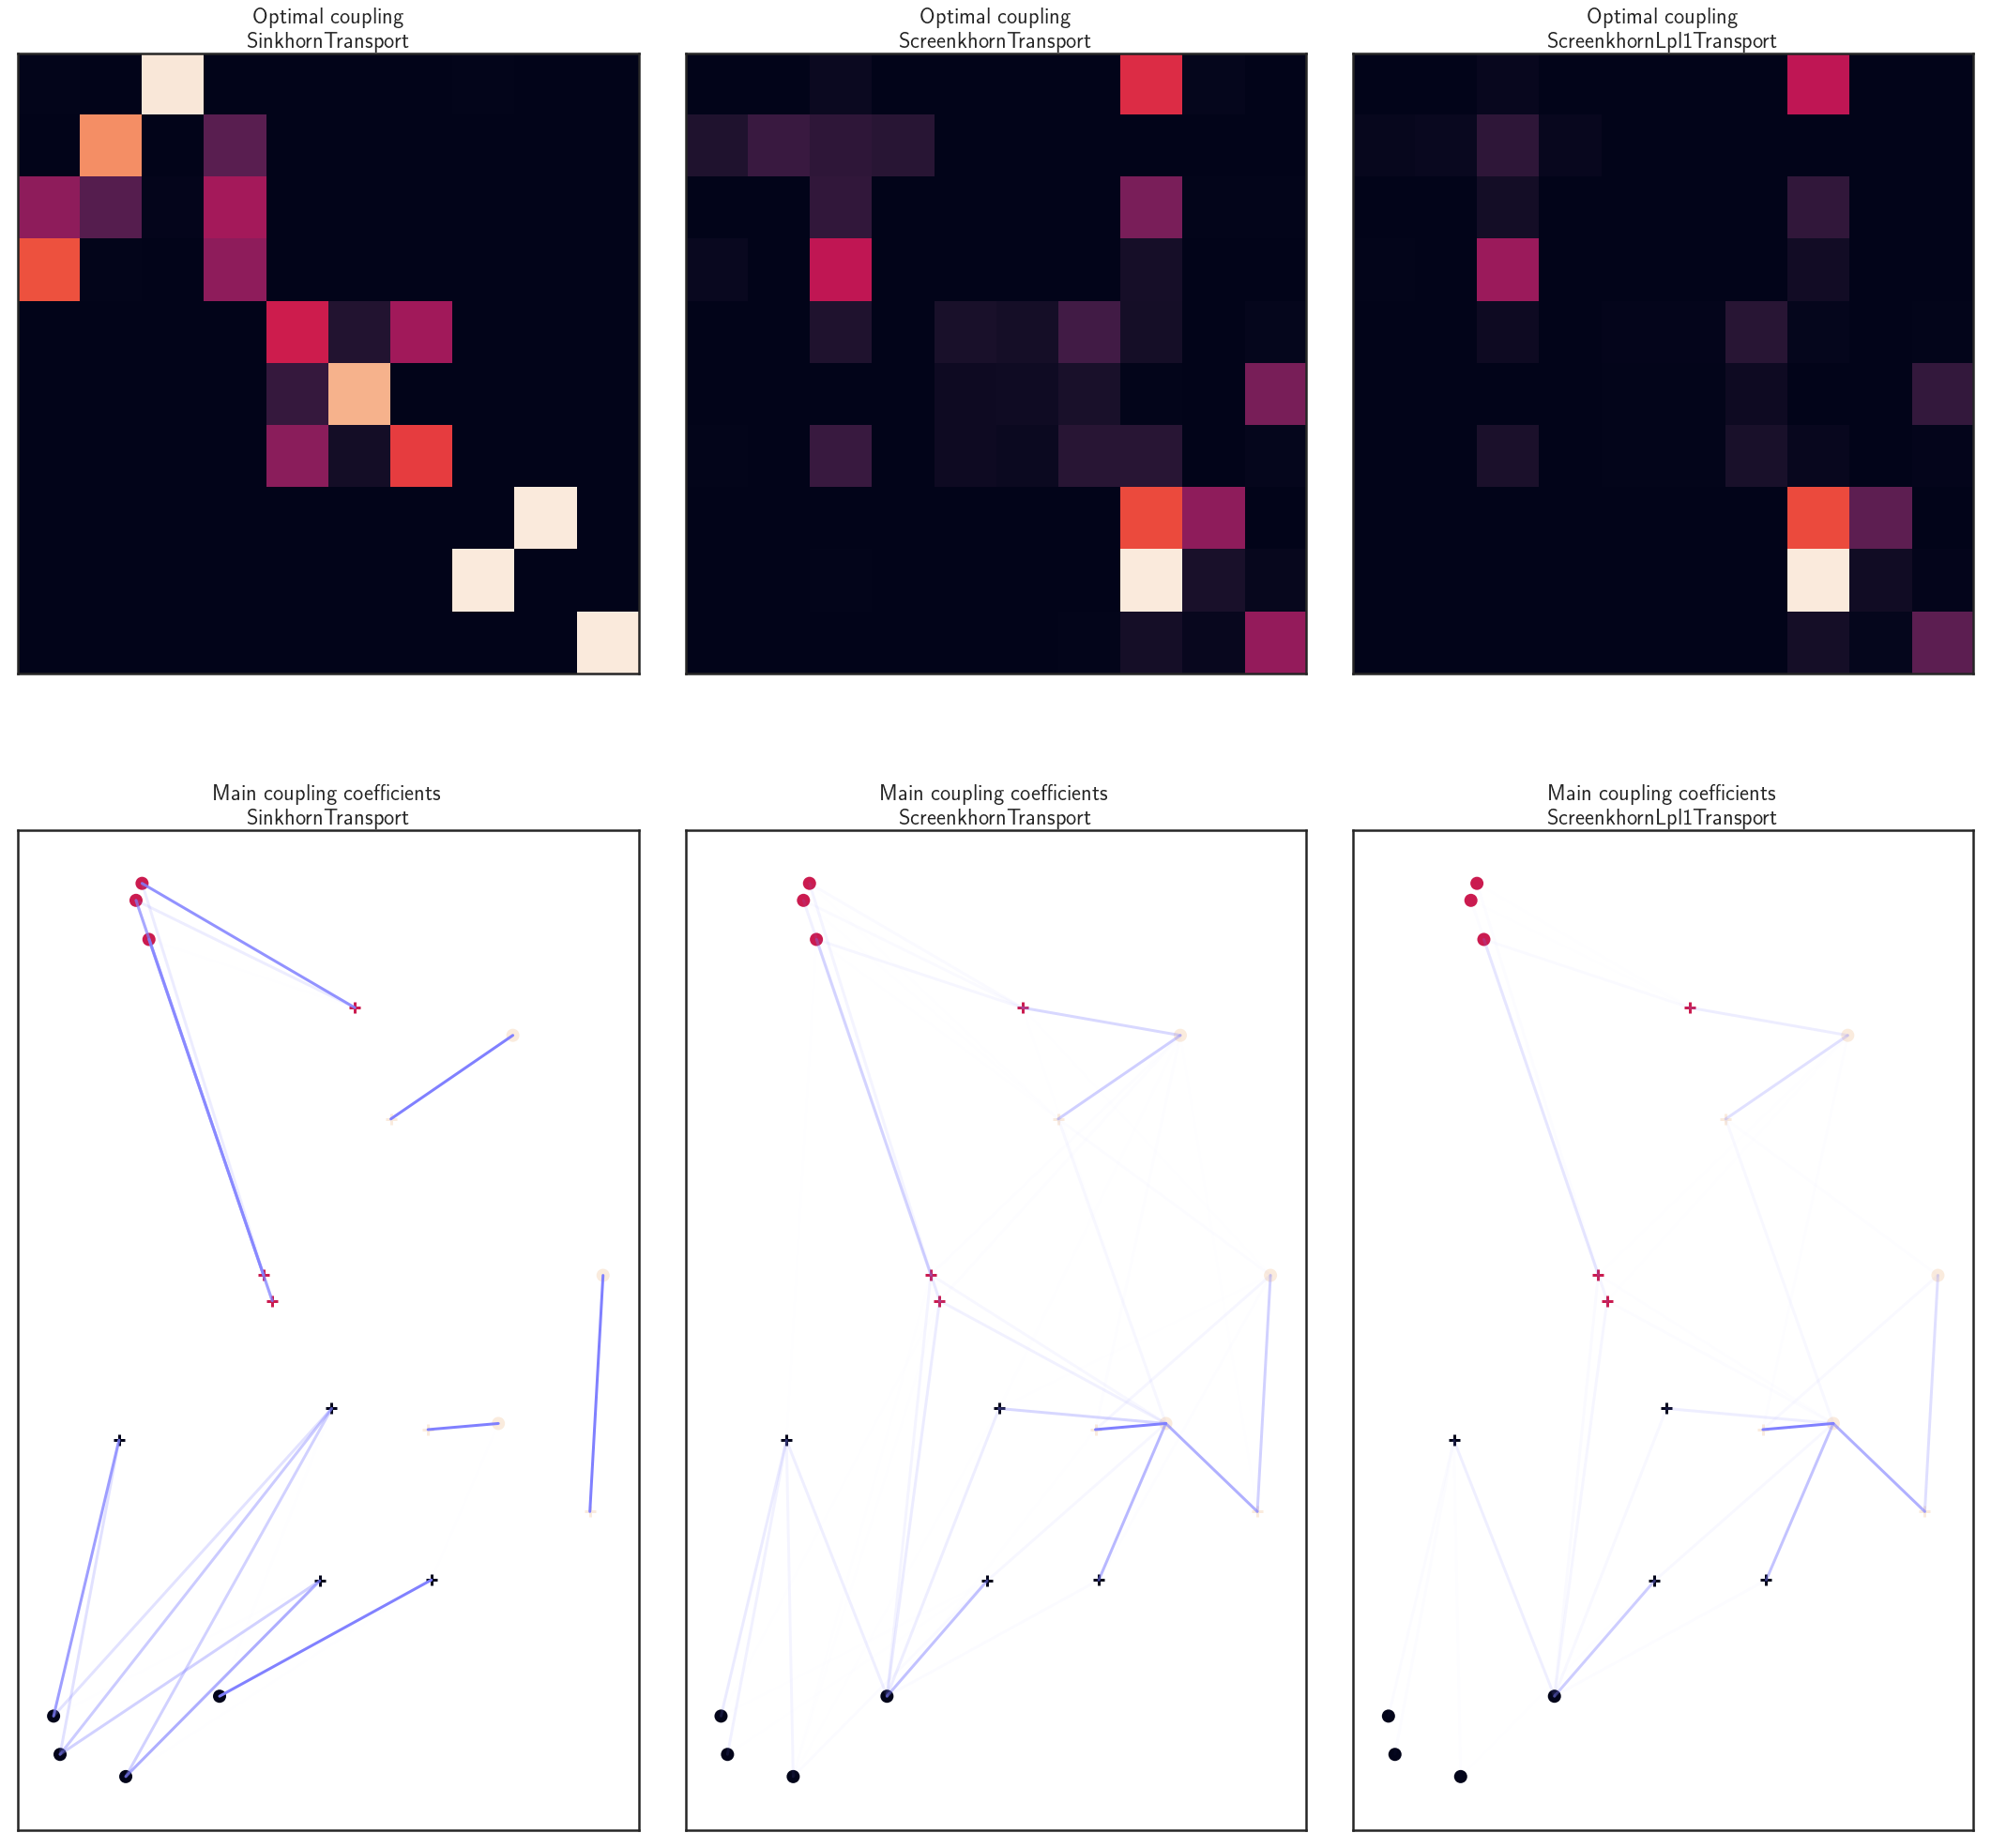

In [27]:
plt.figure(2, figsize=(30, 30))

plt.subplot(2, 3, 1)
pl.imshow(ot_sinkhorn.coupling_, interpolation='nearest')
pl.xticks([])
pl.yticks([])
pl.title('Optimal coupling\nSinkhornTransport')

plt.subplot(2, 3, 2)
plt.imshow(ot_screenkhorn.coupling_, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Optimal coupling\nScreenkhornTransport')

plt.subplot(2, 3, 3)
plt.imshow(ot_lpl1_screenkhorn.coupling_, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title('Optimal coupling\nScreenkhornLpl1Transport')

plt.subplot(2, 3, 4)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_sinkhorn.coupling_, c=[.5, .5, 1])
pl.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
pl.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
pl.xticks([])
pl.yticks([])
pl.title('Main coupling coefficients\nSinkhornTransport')

plt.subplot(2, 3, 5)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_screenkhorn.coupling_, c=[.5, .5, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
plt.xticks([])
plt.yticks([])
plt.title('Main coupling coefficients\nScreenkhornTransport')

plt.subplot(2, 3, 6)
ot.plot.plot2D_samples_mat(Xs, Xt, ot_lpl1_screenkhorn.coupling_, c=[.5, .5, 1])
plt.scatter(Xs[:, 0], Xs[:, 1], c=ys, marker='+', label='Source samples')
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o', label='Target samples')
plt.xticks([])
plt.yticks([])
plt.title('Main coupling coefficients\nScreenkhornLpl1Transport')
plt.tight_layout()

Fig 3 : plot transported samples
--------------------------------



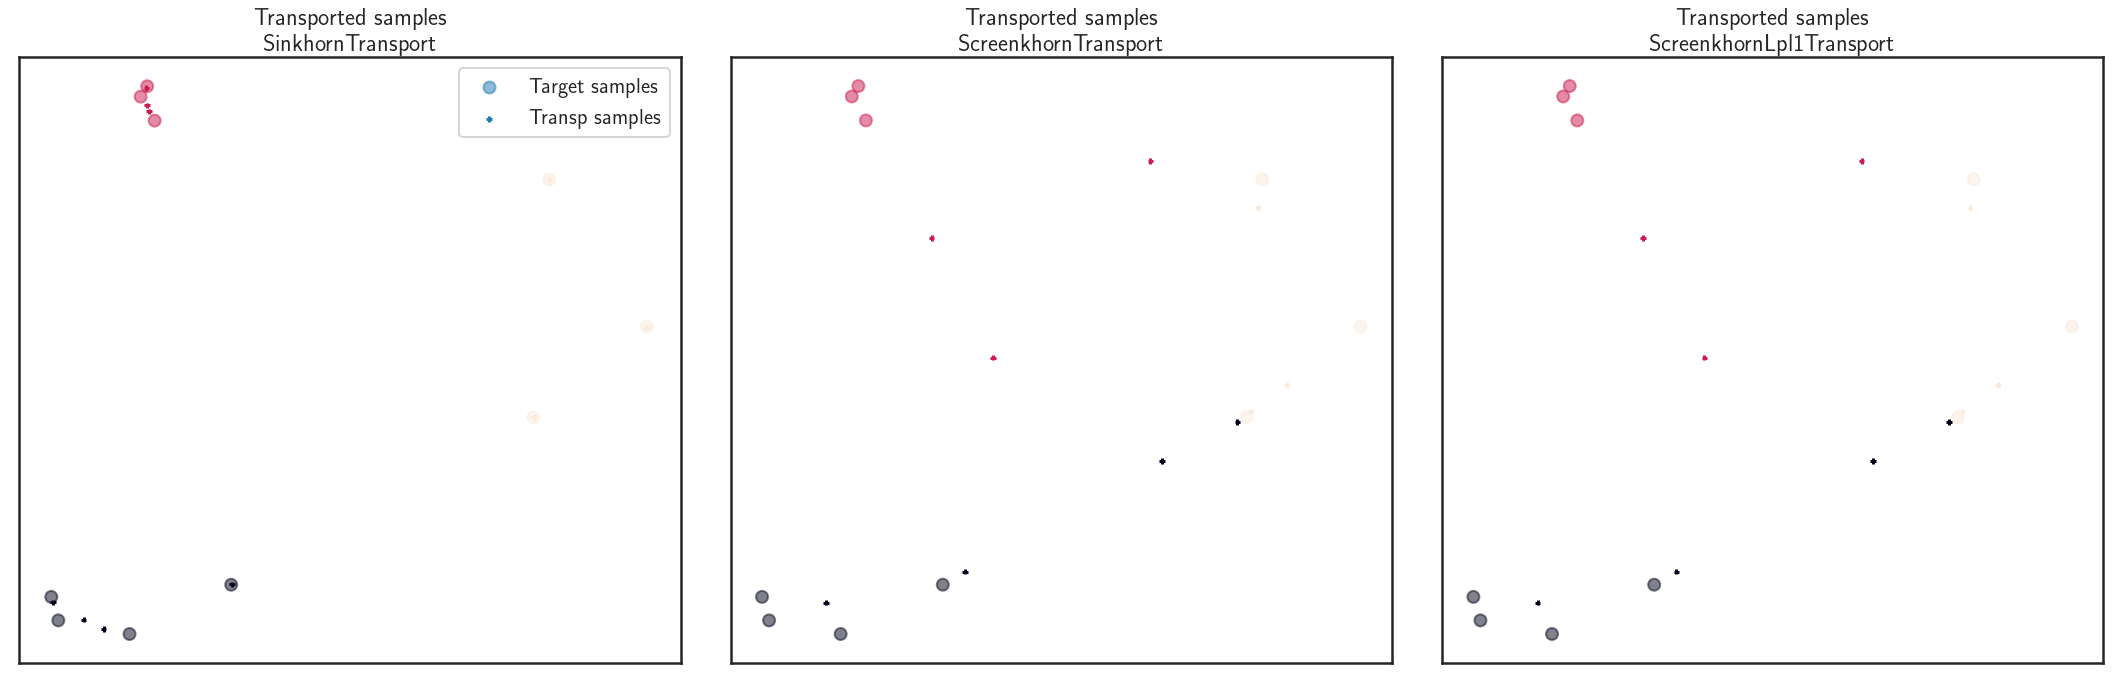

In [17]:
# display transported samples
plt.figure(4, figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
plt.scatter(transp_Xs_sinkhorn[:, 0], transp_Xs_sinkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
plt.title('Transported samples\nSinkhornTransport')
plt.legend(loc=0)
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
plt.scatter(transp_Xs_screenkhorn[:, 0], transp_Xs_screenkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
plt.title('Transported samples\nScreenkhornTransport')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, marker='o',
           label='Target samples', alpha=0.5)
plt.scatter(transp_Xs_lpl1_screenkhorn[:, 0], transp_Xs_lpl1_screenkhorn[:, 1], c=ys,
           marker='+', label='Transp samples', s=30)
plt.title('Transported samples\nScreenkhornLpl1Transport')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()